In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('Japan-data.csv')
df.head(n=10)

,year,fert,gdppc,unemp,cpi,usd-jpy,imports-growth,manuf-growth,life-expect,overtime,infl-rate
0,1968,2.13,12537.88089,1.208333,28.063543,0.002796,11.858928,15.566625,71.610976,114.617434,5.339433
1,1969,2.13,13935.68627,1.166667,29.536828,0.002795,16.423566,16.295498,71.858049,114.071818,5.249821
2,1970,2.13,14114.31582,1.183333,31.534742,0.002796,25.675037,13.857716,71.919756,109.040731,6.924174
3,1971,2.16,14456.82120,1.266667,33.545431,0.003177,4.418281,2.703680,72.809024,91.549296,6.395349
4,1972,2.14,15455.13694,1.433333,35.174345,0.003311,18.505762,7.360451,73.153659,89.677706,4.843517
5,1973,2.14,16463.27917,1.300000,39.255112,0.003571,63.329710,15.163195,73.295122,96.789748,11.608624
6,1974,2.05,16046.78468,1.391667,48.366845,0.003323,61.557662,-3.987752,73.672195,70.079939,23.222246
7,1975,1.91,16333.67482,1.900000,54.042589,0.003277,-6.636234,-10.999036,74.247073,53.077021,11.731266
8,1976,1.85,16801.92503,2.016667,59.115975,0.003415,12.308976,11.183333,74.686585,69.927674,9.374036
9,1977,1.80,17370.61655,2.033333,63.934843,0.004167,9.850962,4.099835,75.255854,73.975384,8.161827


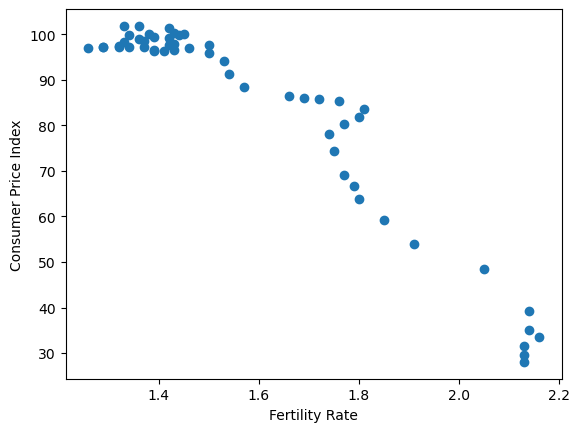

In [39]:
# Exploratory plot of fertility rates and consumer price indices (CPI)
plt.scatter(df['fert'],df['cpi'])
plt.xlabel('Fertility Rate')
plt.ylabel('Consumer Price Index')
plt.show()

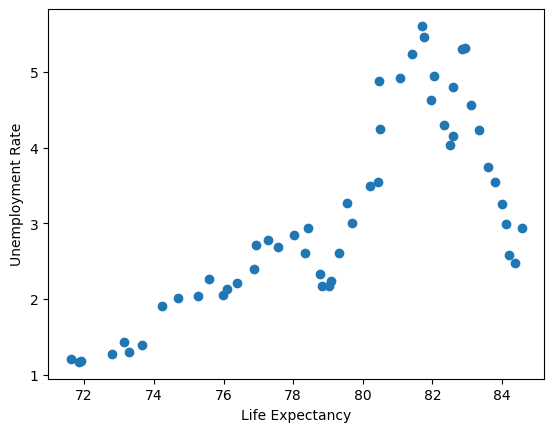

In [40]:
# Exploratory plot of unemployment rates and life expectancies
plt.scatter(df['life-expect'],df['unemp'])
plt.xlabel('Life Expectancy')
plt.ylabel('Unemployment Rate')
plt.show()

In [42]:
# Testing k-means clustering algorithm on just the 2D subspace of life expectancy and unemployment figures
# Specify that we desire 3 distinct clusters for this algorithm

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['life-expect','unemp']])
df['cluster'] = y_predicted
df.head(n=5)

/Users/khilbert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,year,fert,gdppc,unemp,cpi,usd-jpy,imports-growth,manuf-growth,life-expect,overtime,infl-rate,cluster
0,1968,2.13,12537.88089,1.208333,28.063543,0.002796,11.858928,15.566625,71.610976,114.617434,5.339433,1
1,1969,2.13,13935.68627,1.166667,29.536828,0.002795,16.423566,16.295498,71.858049,114.071818,5.249821,1
2,1970,2.13,14114.31582,1.183333,31.534742,0.002796,25.675037,13.857716,71.919756,109.040731,6.924174,1
3,1971,2.16,14456.82120,1.266667,33.545431,0.003177,4.418281,2.703680,72.809024,91.549296,6.395349,1
4,1972,2.14,15455.13694,1.433333,35.174345,0.003311,18.505762,7.360451,73.153659,89.677706,4.843517,1


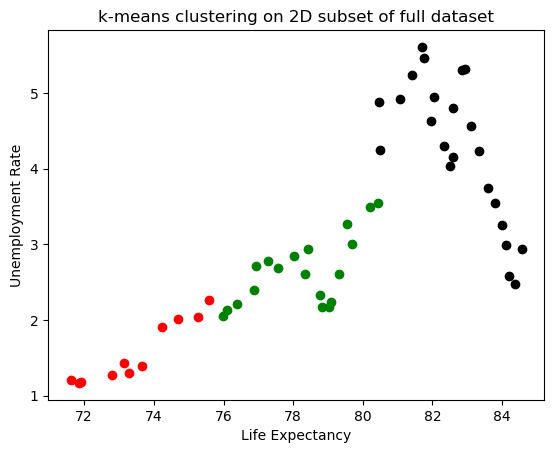

In [46]:
# Check to see how the clustering algorithm performed on the simple test case before proceeding

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.xlabel('Life Expectancy')
plt.ylabel('Unemployment Rate')

plt.scatter(df1['life-expect'], df1['unemp'], color ='green')
plt.scatter(df2['life-expect'], df2['unemp'], color ='red')
plt.scatter(df3['life-expect'], df3['unemp'], color ='black')
plt.title("k-means clustering on 2-D subset of full dataset")
plt.show()

In [47]:
# Now performing k-means clustering on the full 10-dimensional dataset

variables_to_scale = ['fert', 'gdppc', 'unemp', 'cpi', 'usd-jpy', 'imports-growth', 'manuf-growth', 'life-expect', 'overtime', 'infl-rate']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to all variables
scaler.fit(df[variables_to_scale])

# Transform all variables using the fitted scaler
df[variables_to_scale] = scaler.transform(df[variables_to_scale])

# Display the DataFrame df with scaled values
df.head()

,year,fert,gdppc,unemp,cpi,usd-jpy,imports-growth,manuf-growth,life-expect,overtime,infl-rate,cluster
0,1968,0.966667,0.000000,0.009381,0.000000,0.000077,0.433138,0.980899,0.000000,0.991212,0.272319,1
1,1969,0.966667,0.059227,0.000000,0.019974,0.000000,0.483410,1.000000,0.019080,0.982424,0.268673,1
2,1970,0.966667,0.066796,0.003752,0.047060,0.000116,0.585299,0.936114,0.023846,0.901390,0.336805,1
3,1971,1.000000,0.081309,0.022514,0.074320,0.037904,0.351192,0.643802,0.092520,0.619661,0.315286,1
4,1972,0.977778,0.123609,0.060038,0.096404,0.051272,0.506342,0.765841,0.119135,0.589516,0.252140,1


In [53]:
# Again, specify number of desired clusters and output predictions of cluster labels

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[variables_to_scale])
y_predicted
df['cluster'] = y_predicted
df.head(n=10)

/Users/khilbert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,year,fert,gdppc,unemp,cpi,usd-jpy,imports-growth,manuf-growth,life-expect,overtime,infl-rate,cluster
0,1968,0.966667,0.000000,0.009381,0.000000,0.000077,0.433138,0.980899,0.000000,0.991212,0.272319,2
1,1969,0.966667,0.059227,0.000000,0.019974,0.000000,0.483410,1.000000,0.019080,0.982424,0.268673,2
2,1970,0.966667,0.066796,0.003752,0.047060,0.000116,0.585299,0.936114,0.023846,0.901390,0.336805,2
3,1971,1.000000,0.081309,0.022514,0.074320,0.037904,0.351192,0.643802,0.092520,0.619661,0.315286,2
4,1972,0.977778,0.123609,0.060038,0.096404,0.051272,0.506342,0.765841,0.119135,0.589516,0.252140,2
5,1973,0.977778,0.166326,0.030019,0.151728,0.077103,1.000000,0.970326,0.130060,0.704067,0.527423,2
6,1974,0.877778,0.148678,0.050657,0.275260,0.052418,0.980484,0.468441,0.159180,0.273861,1.000000,2
7,1975,0.722222,0.160834,0.165103,0.352208,0.047878,0.229446,0.284697,0.203575,0.000000,0.532413,2
8,1976,0.655556,0.180675,0.191370,0.420990,0.061601,0.438095,0.866026,0.237517,0.271408,0.436494,2
9,1977,0.600000,0.204771,0.195122,0.486321,0.136203,0.411024,0.680391,0.281479,0.336603,0.387167,2


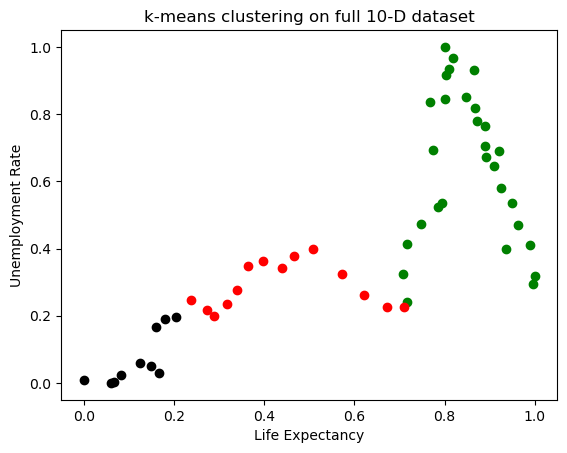

In [74]:
# Performance of k-means on the scaled, full dataset
# As expected, it clustered points in a different manner to the 2D subset clustering result

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.xlabel('Life Expectancy')
plt.ylabel('Unemployment Rate')

plt.scatter(df1['gdppc'], df1['unemp'], color ='green')
plt.scatter(df2['gdppc'], df2['unemp'], color ='red')
plt.scatter(df3['gdppc'], df3['unemp'], color ='black')
plt.title("k-means clustering on full 10-D dataset")
plt.show()

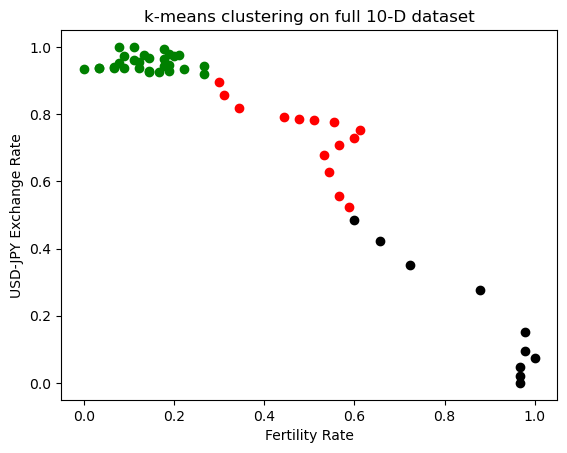

In [75]:
# Performance of k-means on the scaled, full dataset for a different pair of variables for interest

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.xlabel('Fertility Rate')
plt.ylabel('USD-JPY Exchange Rate')

plt.scatter(df1['fert'], df1['cpi'], color ='green')
plt.scatter(df2['fert'], df2['cpi'], color ='red')
plt.scatter(df3['fert'], df3['cpi'], color ='black')
plt.title("k-means clustering on full 10-D dataset")
plt.show()

In [66]:
# Calculate the ''inertia'', i.e. the sum of the squares of each data point to its closest centroid
# Inertia is a common metric for evaluating the performance of the k-means clustering algorithm

df_copy1 = df.drop(df.columns[0], axis=1).copy()
df_copy2 = df.drop(df_copy1.columns[-1], axis=1).copy()
df_copy2.head()

k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_copy2)
    sse.append(km.inertia_)
    
sse

[12436.992952782559,
 3117.049327103301,
 1389.5811255489712,
 783.891797476506,
 514.1816923337642,
 354.1076110919007,
 258.78795764380675,
 198.41655482761186,
 158.61011789596466,
 132.61639882674075]

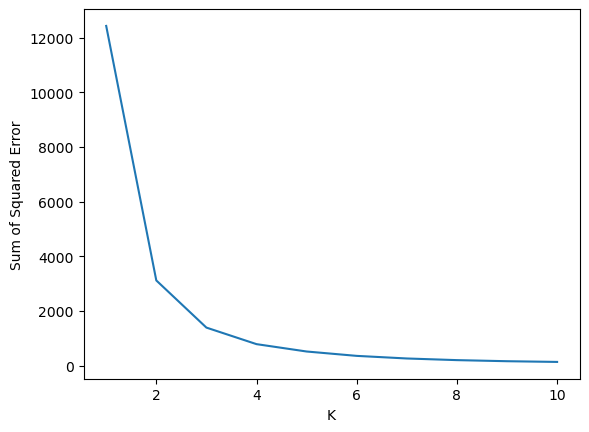

In [69]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)
plt.show()

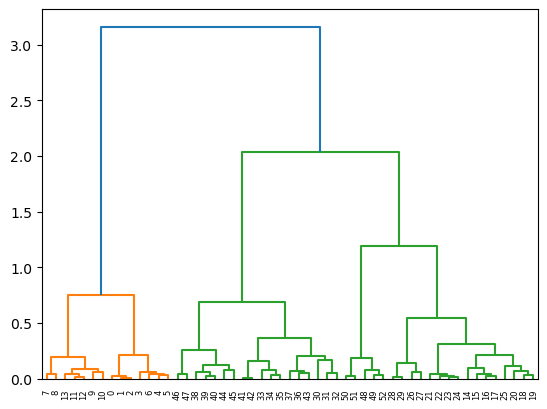

In [70]:
# Now let's compare the performance of another clustering method, namely hierarchical clustering

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = df['life-expect']
y = df['unemp']

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

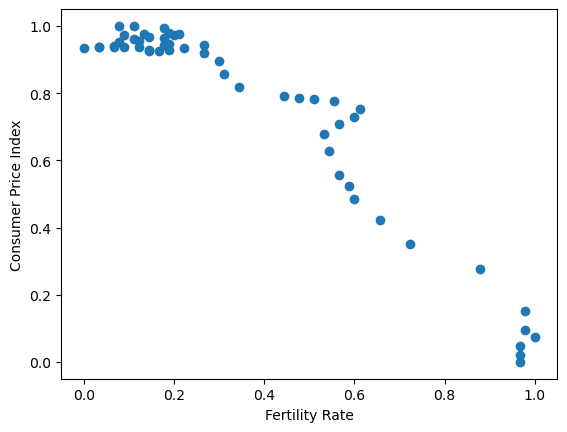

In [71]:
plt.scatter(df['fert'],df['cpi'])
plt.xlabel('Fertility Rate')
plt.ylabel('Consumer Price Index')
plt.show()

/Users/khilbert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


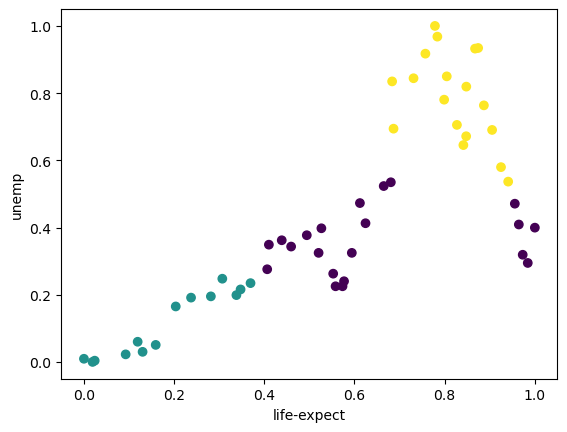

In [73]:
from sklearn.cluster import AgglomerativeClustering

data = list(zip(x, y))
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.xlabel('life-expect')
plt.ylabel('unemp')
plt.scatter(x, y, c=labels)
plt.show()